In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
music=pd.read_csv("Downloads/music_genre.csv")

In [4]:
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [5]:
music.shape

(50005, 18)

In [6]:
music.duplicated().any()
duplicated=music.duplicated()

In [7]:
music[duplicated]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
music.iloc[9999:10006]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9999,41509.0,Hachioji P,Yeah! Yeah!! Yeah!!!,14.0,0.02000,0.573,226374.0,0.921,0.000004,F#,0.325,-3.841,Major,0.0734,135.029,4-Apr,0.599,Anime
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,77089.0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.621,0.029700,G,0.159,-7.429,Major,0.0382,142.065,4-Apr,0.607,Jazz


In [9]:
music.drop([10000,10001,10002,10003,10004],inplace=True)

In [10]:
music.shape


(50000, 18)

In [11]:
len(music['instance_id'].unique())

50000

In [12]:
len(music["artist_name"].unique())

6863

In [13]:
music["key"].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

In [14]:
music["mode"].unique()

array(['Minor', 'Major'], dtype=object)

In [15]:
music["obtained_date"].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', '0/4'], dtype=object)

In [16]:
music["music_genre"].unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [17]:
music.reset_index(inplace = True)#data index was reset as 5 rows were removed

In [18]:
#removing non predictive features

In [19]:
music = music.drop(["index", "instance_id", "track_name", "obtained_date"], axis = 1)

In [20]:
music.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [21]:
music[music["artist_name"] == "empty_field"]

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
19,empty_field,50.0,0.02810,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,0.1990,Electronic
25,empty_field,34.0,0.02360,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,0.4180,Electronic
44,empty_field,31.0,0.00350,0.595,222147.0,0.904,0.003780,D,0.0533,-6.805,Minor,0.0349,127.61,0.8410,Electronic
128,empty_field,32.0,0.01390,0.498,-1.0,0.945,0.647000,F,0.3380,-0.003,Minor,0.1370,149.888,0.1790,Electronic
135,empty_field,44.0,0.15300,0.792,265133.0,0.549,0.379000,F,0.3430,-9.855,Major,0.0456,120.01299999999999,0.4760,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49937,empty_field,50.0,0.05480,0.754,132414.0,0.840,0.000014,A,0.1500,-5.111,Major,0.3130,144.991,0.0397,Hip-Hop
49951,empty_field,52.0,0.13300,0.867,-1.0,0.618,0.000002,B,0.1280,-4.956,Minor,0.0614,140.005,0.8570,Hip-Hop
49966,empty_field,51.0,0.12400,0.786,187027.0,0.738,0.000000,C,0.1400,-5.621,Major,0.3890,93.758,0.7800,Hip-Hop
49986,empty_field,53.0,0.00392,0.770,211820.0,0.905,0.000003,F,0.1690,-8.235,Minor,0.1440,135.999,0.4640,Hip-Hop


In [22]:
artists = music["artist_name"].value_counts()[:20].sort_values(ascending = True)

In [23]:
artists

Ryuichi Sakamoto              90
$uicideBoy$                   92
Logic                         92
Howard Shore                  93
Mac Miller                    97
Kevin Gates                  102
Pyotr Ilyich Tchaikovsky     103
The Black Keys               114
Thievery Corporation         122
Future                       124
Eminem                       147
Yuki Hayashi                 167
Capcom Sound Team            169
Drake                        172
Frédéric Chopin              241
Johann Sebastian Bach        314
Ludwig van Beethoven         317
Wolfgang Amadeus Mozart      402
Nobuo Uematsu                429
empty_field                 2489
Name: artist_name, dtype: int64

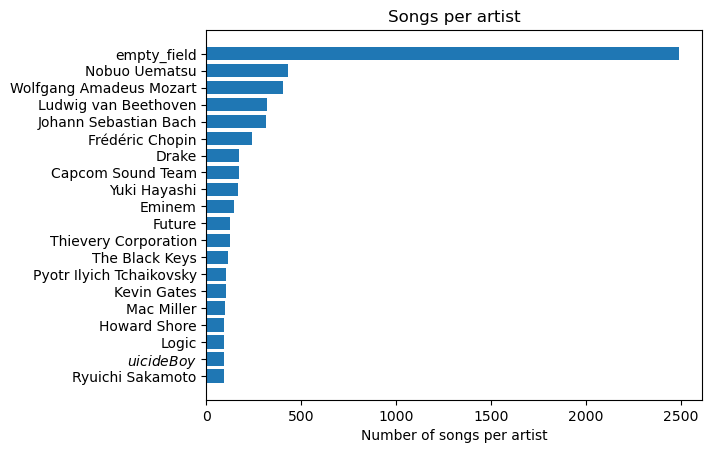

In [24]:
plt.barh(artists.index, artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()

In [25]:
#All samples with "empty_field" in artist_name were removed to make this visualisation more informative.

In [26]:
music = music.drop(music[music["artist_name"] == "empty_field"].index)

In [27]:
top_20_artists = music["artist_name"].value_counts()[:20].sort_values(ascending = True)

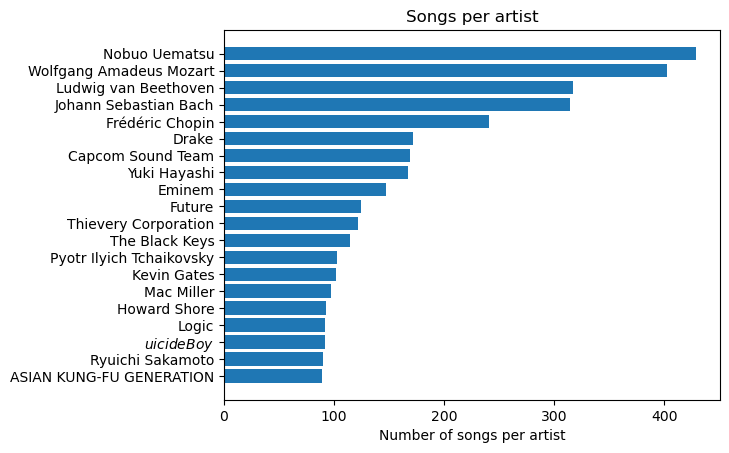

In [28]:
plt.barh(top_20_artists.index, top_20_artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()

In [29]:
music.drop("artist_name", axis = 1, inplace = True)

In [30]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [31]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = music, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()

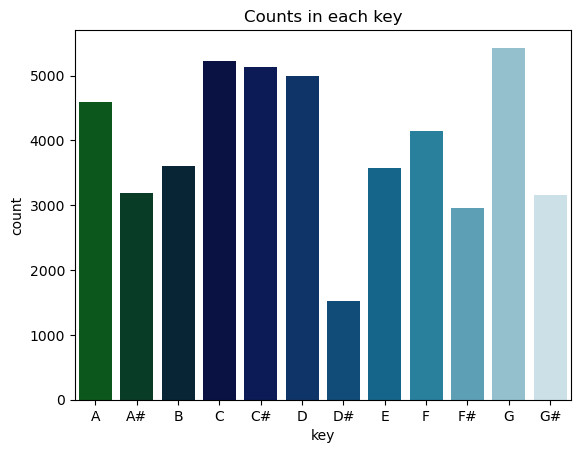

In [32]:
plot_counts("key", ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"])

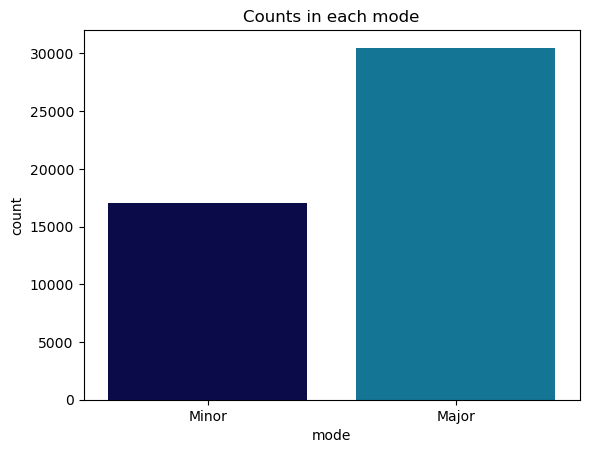

In [33]:
plot_counts("mode")

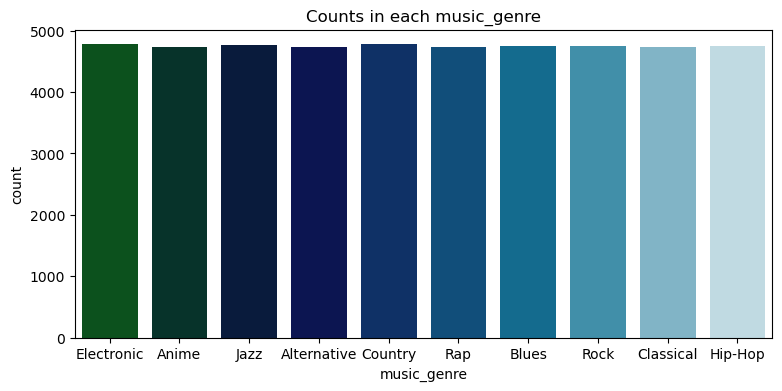

In [34]:
plt.figure(figsize = (9, 4))
plot_counts("music_genre")

In [35]:
music[music["tempo"] == "?"]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
5,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,0.6140,Electronic
32,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,0.1380,Electronic
35,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,0.2390,Electronic
36,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,0.7270,Electronic
39,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49913,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,0.1440,Hip-Hop
49959,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,0.8860,Hip-Hop
49962,62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,0.2210,Hip-Hop
49971,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,0.5890,Hip-Hop


In [36]:
music = music.drop(music[music["tempo"] == "?"].index)

In [37]:
music["tempo"] = music["tempo"].astype("float")

In [38]:
music["tempo"] = np.around(music["tempo"], decimals = 2)

In [39]:
numeric_features = music.drop(["key", "music_genre", "mode"], axis = 1)

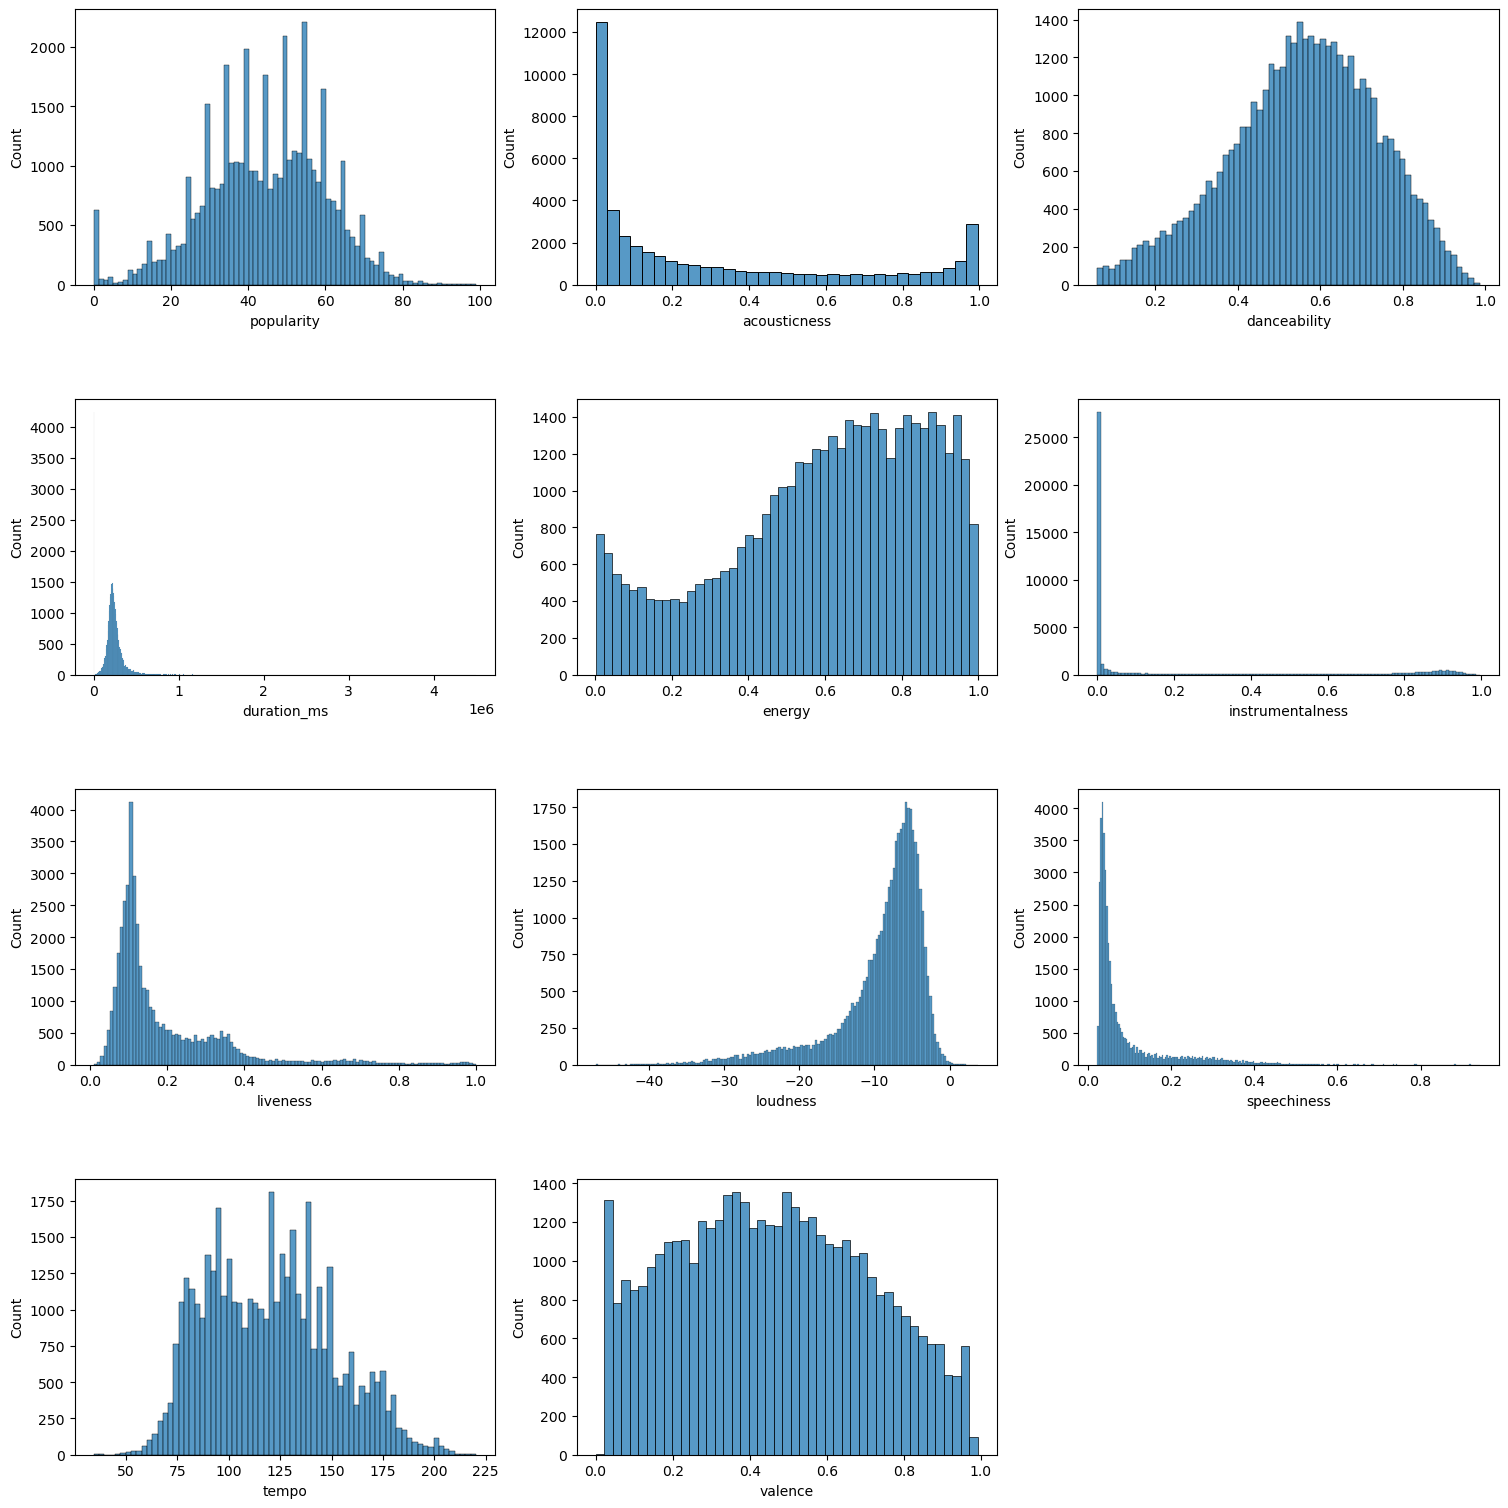

In [40]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
index = 0

axs = axs.flatten()
for k, v in numeric_features.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

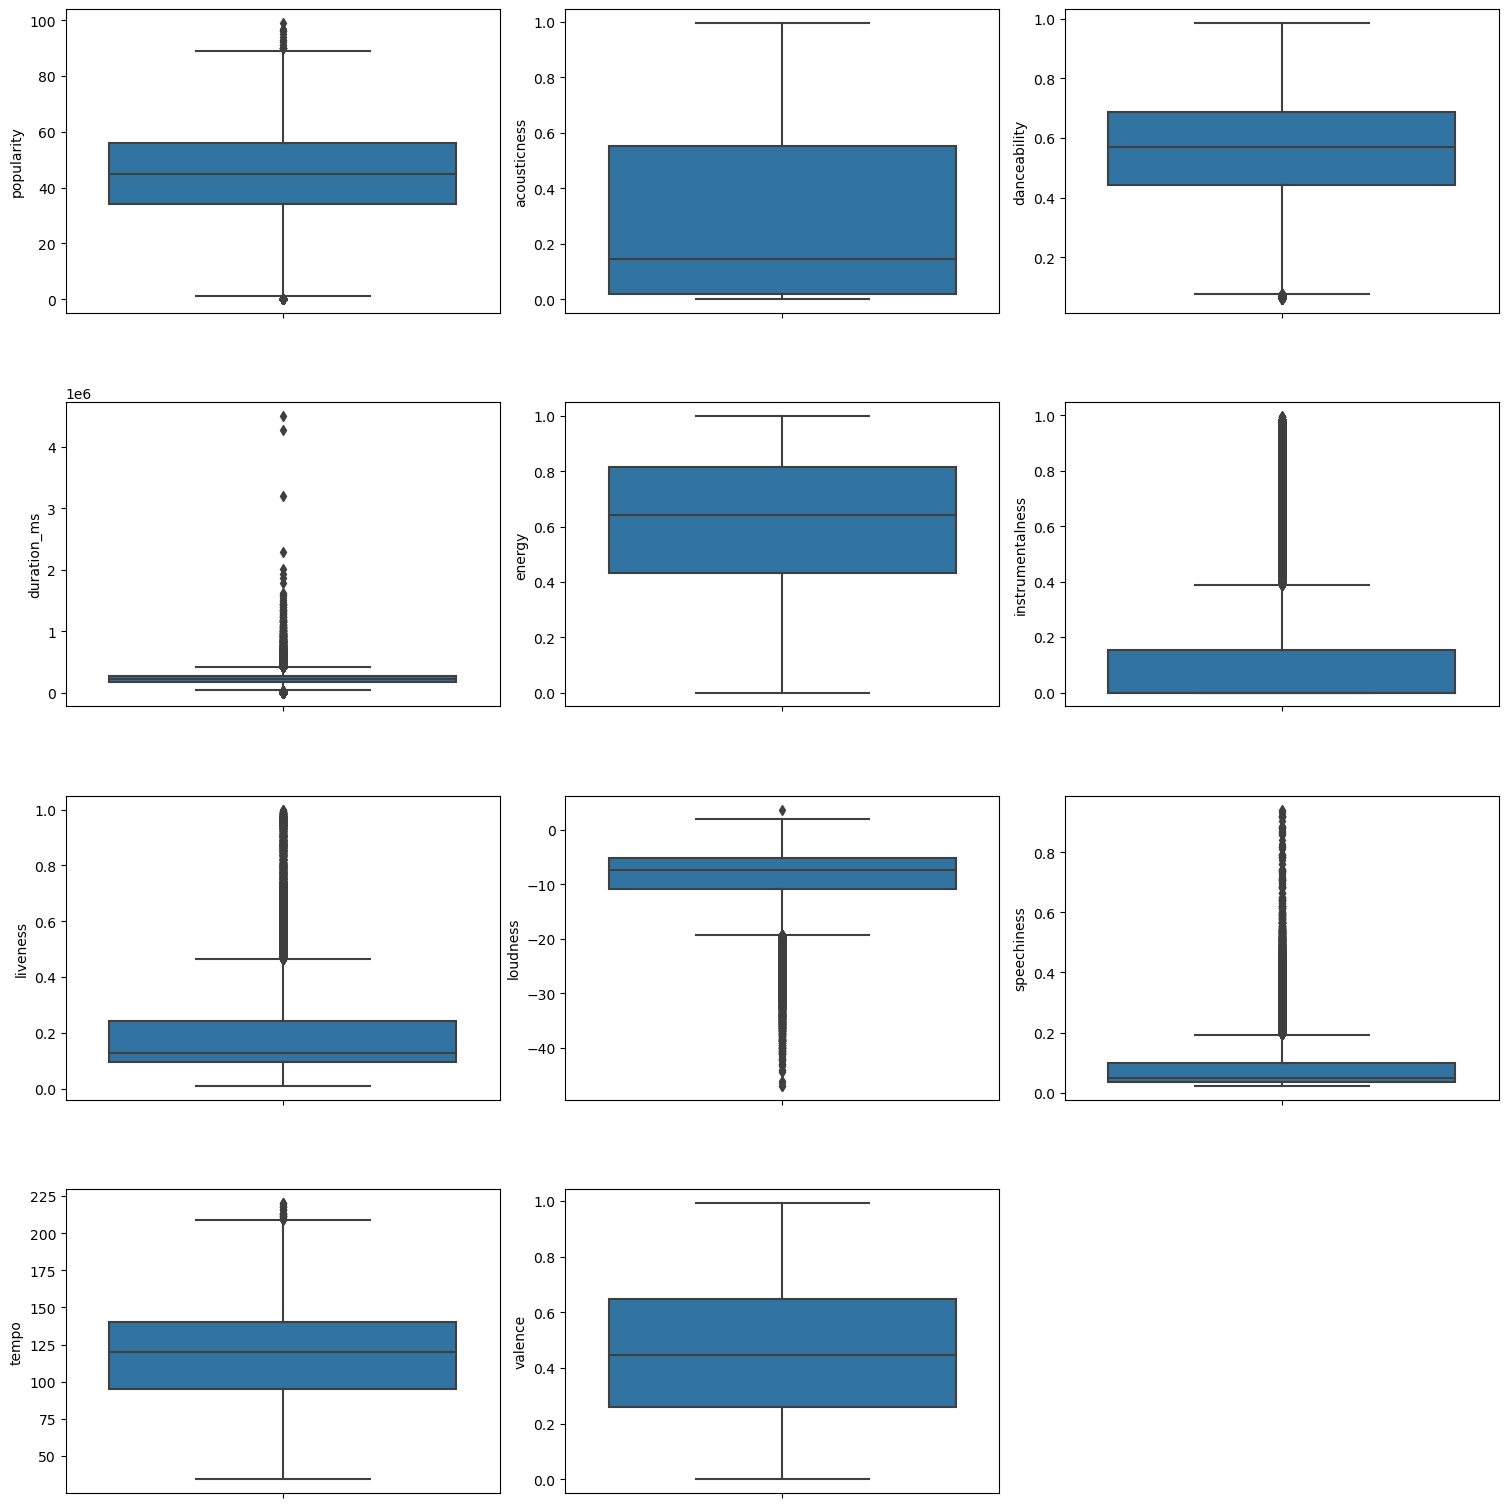

In [41]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in numeric_features.items():
    sns.boxplot(y = k, data = numeric_features, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [42]:
key_encoder = LabelEncoder()

In [43]:
music["key"] = key_encoder.fit_transform(music["key"])

In [44]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,Minor,0.0748,100.89,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic


In [45]:
#key encoded
key_encoder.classes_

array(['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype=object)

In [46]:
mode_encoder = LabelEncoder()
music["mode"] = mode_encoder.fit_transform(music["mode"])
music.head()
#mode encoded

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.89,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.00,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.99,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.01,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.04,0.323,Electronic


In [47]:
mode_encoder.classes_

array(['Major', 'Minor'], dtype=object)

In [48]:
music_features=music.drop('music_genre',axis=1)
music_labels=music['music_genre']

In [49]:
scaler=StandardScaler()

In [50]:
music_features_scaled = scaler.fit_transform(music_features)

In [51]:
music_features_scaled.mean(), music_features_scaled.std()

(-3.515141769228604e-17, 1.0)

In [52]:
tr_val_f, test_features, tr_val_l, test_labels = train_test_split(
    music_features_scaled, music_labels, test_size = 0.1, stratify = music_labels)

In [53]:
train_features, val_features, train_labels, val_labels = train_test_split(
    tr_val_f, tr_val_l, test_size = len(test_labels), stratify = tr_val_l)

In [54]:
train_features.shape, train_labels.shape, val_features.shape, val_labels.shape, test_features.shape,   test_labels.shape

((34231, 13), (34231,), (4280, 13), (4280,), (4280, 13), (4280,))

In [55]:
f1 = make_scorer(f1_score, average = "weighted")

In [56]:
params = {
    "n_estimators": [10, 15, 20, 25, 30, 35],
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

In [57]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = params, scoring = f1, cv = 5)

In [58]:
model = RandomForestClassifier(n_estimators = 35, max_depth = 15, min_samples_leaf = 4)

In [60]:
model.fit(train_features, train_labels)


RandomForestClassifier(max_depth=15, min_samples_leaf=4, n_estimators=35)

In [62]:
def classification_task(estimator, features, labels):
    predictions = estimator.predict(features)
    
    print(f"Accuracy: {accuracy_score(labels, predictions)}")
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

In [63]:
classification_task(model, train_features, train_labels)

Accuracy: 0.8007361748123046
F1 score: 0.801295475655421


In [64]:
classification_task(model, val_features, val_labels)

Accuracy: 0.5651869158878504
F1 score: 0.5638033332006227


In [65]:
classification_task(model, test_features, test_labels)

Accuracy: 0.5586448598130841
F1 score: 0.5564951035604765


In [66]:
#The model obtains 80% "accuracy" and "f1_score" on train data and around 56% - on validation and test samples, which is not so good result.

In [67]:
print(classification_report(test_labels, model.predict(test_features)))

              precision    recall  f1-score   support

 Alternative       0.43      0.30      0.35       425
       Anime       0.78      0.73      0.76       425
       Blues       0.57      0.50      0.53       424
   Classical       0.85      0.81      0.83       426
     Country       0.56      0.57      0.57       429
  Electronic       0.66      0.60      0.63       427
     Hip-Hop       0.37      0.38      0.38       430
        Jazz       0.53      0.58      0.55       432
         Rap       0.37      0.38      0.38       427
        Rock       0.50      0.73      0.59       435

    accuracy                           0.56      4280
   macro avg       0.56      0.56      0.56      4280
weighted avg       0.56      0.56      0.56      4280



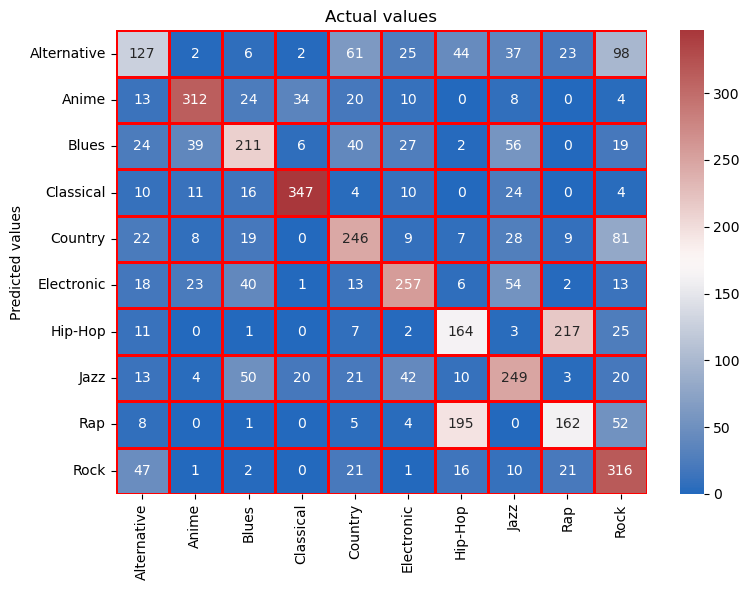

In [68]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(test_labels, model.predict(test_features)),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = model.classes_,
    yticklabels = model.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

In [69]:
model.feature_importances_

array([0.2439896 , 0.1006499 , 0.0961952 , 0.04630814, 0.06771354,
       0.09298025, 0.01743797, 0.0293047 , 0.1017312 , 0.01188521,
       0.09653485, 0.03746697, 0.05780247])

In [70]:
predicted_labels = model.predict_proba(test_features)

In [71]:
roc_auc_score(test_labels, predicted_labels, multi_class = "ovr")

0.9245896092909621

In [72]:
#92% AUC is quite a good result. This shows that many samples were properly predicted. Curves positioned to the top-left corner suggest a really well performing model.

In [75]:
from xgboost import XGBClassifier


/home/nihit/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [76]:
model = XGBClassifier(n_estimators = 35, max_depth = 15, min_samples_leaf = 4)

In [77]:
model.fit(train_features, train_labels)


/home/nihit/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:13:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, min_child_weight=1,
              min_samples_leaf=4, missing=nan, monotone_constraints='()',
              n_estimators=35, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
classification_task(model, train_features, train_labels)

Accuracy: 0.9721013116765505
F1 score: 0.9720770234289946


In [80]:
classification_task(model, val_features, val_labels)

Accuracy: 0.5464953271028037
F1 score: 0.5481370602026491


In [81]:
classification_task(model, test_features, test_labels)

Accuracy: 0.5434579439252336
F1 score: 0.5453339034156319


In [82]:
print(classification_report(test_labels, model.predict(test_features)))

              precision    recall  f1-score   support

 Alternative       0.36      0.34      0.35       425
       Anime       0.79      0.75      0.77       425
       Blues       0.58      0.50      0.54       424
   Classical       0.86      0.81      0.83       426
     Country       0.54      0.56      0.55       429
  Electronic       0.64      0.64      0.64       427
     Hip-Hop       0.35      0.38      0.36       430
        Jazz       0.55      0.57      0.56       432
         Rap       0.32      0.33      0.32       427
        Rock       0.49      0.56      0.52       435

    accuracy                           0.54      4280
   macro avg       0.55      0.54      0.55      4280
weighted avg       0.55      0.54      0.55      4280



In [83]:
predicted_labels = model.predict_proba(test_features)

In [84]:
roc_auc_score(test_labels, predicted_labels, multi_class = "ovr")

0.9171087471902023